# ESTADÍSTICA II

## TRABAJO MUESTREO - INTERFERENCIA

### Integrantes:
* Christian Ruiz Lagos
* Nicolás Galván
* David Rojas

 En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1

Considere estos datos como una población finita. Las variables que componen la tabla son:

- **periodo:** año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
- **apli_consecutivo:** consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante. 
- **estu_depto_reside:** departamento de residencia del estudiante.
- **estu_cod_reside_depto:** código DANE del departamento de residencia del estudiante.
- **inst_cod_institucion:** código de la IES ante el ministerio. Único por Institución.
- **inst_nombre_institucion:** Nombre de la Institución. Algunas presentan sedes y subsedes.
- **raz_cuant_punt:** Puntaje Razonamiento Cuantitativo.
- **raz_cuant_des:** Nivel de Desempeño Razonamiento Cuantitativo (categórica).
- **lect_crit_punt:** Puntaje Lectura Crítica.
- **lect_crit_des:** Nivel de Desempeño Lectura Crítica (categórica).
- **comp_ciud_punt:** Puntaje Competencias Ciudadanas.
- **comp_ciud_des:** Nivel de Desempeño Competencias Ciudadanas (categórica).
- **ingles_punt:** Puntaje Inglés.
- **ingles_desem:** Nivel de Desempeño en Inglés (categórica).
- **comu_escr_punt:** Puntaje Comunicación Escrita.
- **comu_escr_des:** Nivel de Desempeño Comunicación Escrita (categórica).

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:

1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
2. Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
3. Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
4. ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
5. Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
6. Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

**Recomendaciones:**

- Procure tabular de manera adecuada las estimaciones para optimizar espacio
- Evite extenderse en las explicaciones
- Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
- Referencie las fórmulas empleadas en los cálculos

In [1]:
#Llamado de librerías a utilizar
library(plyr, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)
library(SamplingUtil)
library(samplingbook)
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

Warning message:
"package 'samplingbook' was built under R version 3.6.3"Loading required package: pps
Loading required package: sampling
Warning message:
"package 'sampling' was built under R version 3.6.3"Loading required package: survey
Warning message:
"package 'survey' was built under R version 3.6.3"Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: 'survival'

The following objects are masked from 'package:sampling':

    cluster, strata


Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart



In [2]:
data <- get(load(url('https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1')))
ls() # Con esta función podemos revisar los objetos que tenemos en el área de trabajo

[1] "data"     "sp161718"

In [3]:
dim(data) # Cuáles son las dimensiones de data.frame

[1] 725295     16

In [4]:
names(data) # Los nombres de las variables del conjunto de datos

[1] "periodo"                 "apli_consecutivo"       
 [3] "estu_depto_reside"       "estu_cod_reside_depto"  
 [5] "inst_cod_institucion"    "inst_nombre_institucion"
 [7] "raz_cuant_punt"          "raz_cuant_des"          
 [9] "lect_crit_punt"          "lect_crit_des"          
[11] "comp_ciud_punt"          "comp_ciud_des"          
[13] "ingles_punt"             "ingles_desem"           
[15] "comu_escr_punt"          "comu_escr_des"

In [5]:
data_ordenada_por_periodo <- arrange(data, periodo) #Para ordenar los registros por periodo (requiere library(dplyr))

## Agrupación de la variable periodo 

In [6]:
unique(data_ordenada_por_periodo['periodo']) #Imprimiendo la columna periodo del dataframe ordenado SIN valores duplicados

,periodo
1,20162
1309,20163
242629,20172
244037,20173
488195,20182
489722,20183
724923,20184


In [7]:
#Se puede observar como por cada año la información está fragmentada en dos periodos. Por esto se hará un REVALUE
#para agrupar la información.

data$periodo <- revalue(as.factor(data$periodo),c("20162" = "2016", "20163" = "2016", '20172' = "2017", '20173' = "2017", '20182' = "2018", '20183' = "2018", '20184' = '2018'))

In [8]:
unique(data['periodo']) #Imprimiendo la columna periodo del dataframe ordenado SIN valores duplicados después del REVALUE

,periodo
1,2016
242629,2017
488195,2018


In [9]:
#Comprobando que los registros han sido agrupados por años (2016, 2017, 2018)
head(data['periodo'], 242630); #Imprimiendo los primeros 242630 registros
tail(data['periodo'], 237102); #Imprimiendo los últimos 237102 registros

periodo
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016


,periodo
488194,2017
488195,2018
488196,2018
488197,2018
488198,2018
488199,2018
488200,2018
488201,2018
488202,2018
488203,2018


## Arreglando la variable departamento

In [10]:
unique(data$estu_depto_reside)

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARIÃ‘O         CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA         NARIÃƒâ\200\230O     
36 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... NARIÃƒâ\200\230O

In [11]:
temp<-factor(data$estu_depto_reside)
data$estu_depto_reside<-revalue(temp, c("NARIÃ‘O"="NARINO", "NARIÃƒâ\200\230O"="NARINO"))
## Renombramos algunos departamentos mal escritos
unique(data$estu_depto_reside) # Verificamos que se solucionó

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARINO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

In [12]:
#Verificando los valores de las variables categóricas
unique(data$raz_cuant_des)
unique(data$lect_crit_des) 
unique(data$comp_ciud_des)
unique(data$ingles_desem) 
unique(data$comu_escr_des) 

[1] 3 2 1 4

[1] 2 3 1 4

[1] 3 1 2 4

[1] A2  A1  A1- B1  B2 
Levels: A1 A1- A2 B1 B2

[1]  3  2  4  1 NA

In [13]:
#Cuatro de las cinco variables categóricas tienen valores numéricos, procedemos a cambiarlo a través de la función
#factor

data$raz_cuant_des <- factor(data$raz_cuant_des, levels = c(1,2,3,4), labels = c("Deficiente","Regular","Sobresaliente","Excelente"))
data$lect_crit_des <- factor(data$lect_crit_des, levels = c(1,2,3,4), labels = c("Deficiente","Regular","Sobresaliente","Excelente")) 
data$comp_ciud_des <- factor(data$comp_ciud_des, levels = c(1,2,3,4), labels = c("Deficiente","Regular","Sobresaliente","Excelente")) 
data$comu_escr_des <- factor(data$comu_escr_des, levels = c(1,2,3,4), labels = c("Deficiente","Regular","Sobresaliente","Excelente")) 

In [14]:
head(data[, c('raz_cuant_des', 'lect_crit_des', 'comp_ciud_des', 'ingles_desem','comu_escr_des')]);#Head de las variables categóricas
#del dataframe

raz_cuant_des,lect_crit_des,comp_ciud_des,ingles_desem,comu_escr_des
Sobresaliente,Regular,Sobresaliente,A2,Sobresaliente
Regular,Regular,Deficiente,A1,Sobresaliente
Regular,Regular,Regular,A1-,Regular
Sobresaliente,Sobresaliente,Regular,A2,Excelente
Regular,Deficiente,Regular,B1,Regular
Sobresaliente,Regular,Regular,A1-,Sobresaliente


Vamos a centrarnos en las variables cuántitativas de los puntajes obtenidos, estas son:

In [15]:
head(data[, c('raz_cuant_punt', 'lect_crit_punt', 'comp_ciud_punt', 'ingles_punt', 'comu_escr_punt')])#Head de las variables
#cuántitativas y sobre las cuales haremos un muestreo aleatorio simple (MAS).

raz_cuant_punt,lect_crit_punt,comp_ciud_punt,ingles_punt,comu_escr_punt
160,130,167,160,155
138,132,77,125,164
146,157,150,104,122
160,172,151,160,192
130,122,144,192,131
159,129,147,108,154


In [16]:
#eliminamos los NA
datoslimpios = na.omit(data)
Lcomu_escr=round(mean(datoslimpios$comu_escr_punt))
data$comu_escr_punt[is.na(data$comu_escr_punt)]=Lcomu_escr

In [17]:
#Definimos un dataframe más compacto con el que trabajar

df <- data.frame(Periodo = data$periodo, Departamento = data$estu_depto_reside, RC_Puntaje= data$raz_cuant_punt, LC_Puntaje = data$lect_crit_punt, CC_Puntaje = data$comp_ciud_punt, Ingles_Puntaje = data$ingles_punt, CE_Puntaje = data$comu_escr_punt)


In [18]:
head(df)

Periodo,Departamento,RC_Puntaje,LC_Puntaje,CC_Puntaje,Ingles_Puntaje,CE_Puntaje
2016,ATLANTICO,160,130,167,160,155
2016,CUNDINAMARCA,138,132,77,125,164
2016,CALDAS,146,157,150,104,122
2016,MAGDALENA,160,172,151,160,192
2016,CORDOBA,130,122,144,192,131
2016,CAUCA,159,129,147,108,154


In [19]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
    x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

## 1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables

## Tamaño de muestra

In [20]:
tmuestra1<-sample.size.prop(e=0.05, P = 0.5, N = nrow(df), level = 0.90)
tmuestra2<-sample.size.prop(e=0.05, P = 0.5, N = nrow(df), level = 0.95)
tmuestra3<-sample.size.prop(e=0.05, P = 0.5, N = nrow(df), level = 0.99)
print(tmuestra1)
print(tmuestra2)
print(tmuestra3)


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=725295, precision e=0.05 and expected proportion P=0.5

Sample size needed: 271


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=725295, precision e=0.05 and expected proportion P=0.5

Sample size needed: 384


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=725295, precision e=0.05 and expected proportion P=0.5

Sample size needed: 663



Por lo visto en clase, necesitamos conocer el tamaño de muestra adecuado para la población. Para esto se toma un nivel de confianza de 95% y la proporción predeterminada de 0.5.

In [21]:
#Creamos las muestras para el n=384
n1<-384
s1<- sample(1:nrow(df),size=n1,replace=FALSE)
n2<-663
s2<- sample(1:nrow(df),size=n2,replace=FALSE)
n3<-1000
s3<- sample(1:nrow(df),size=n3,replace=FALSE)

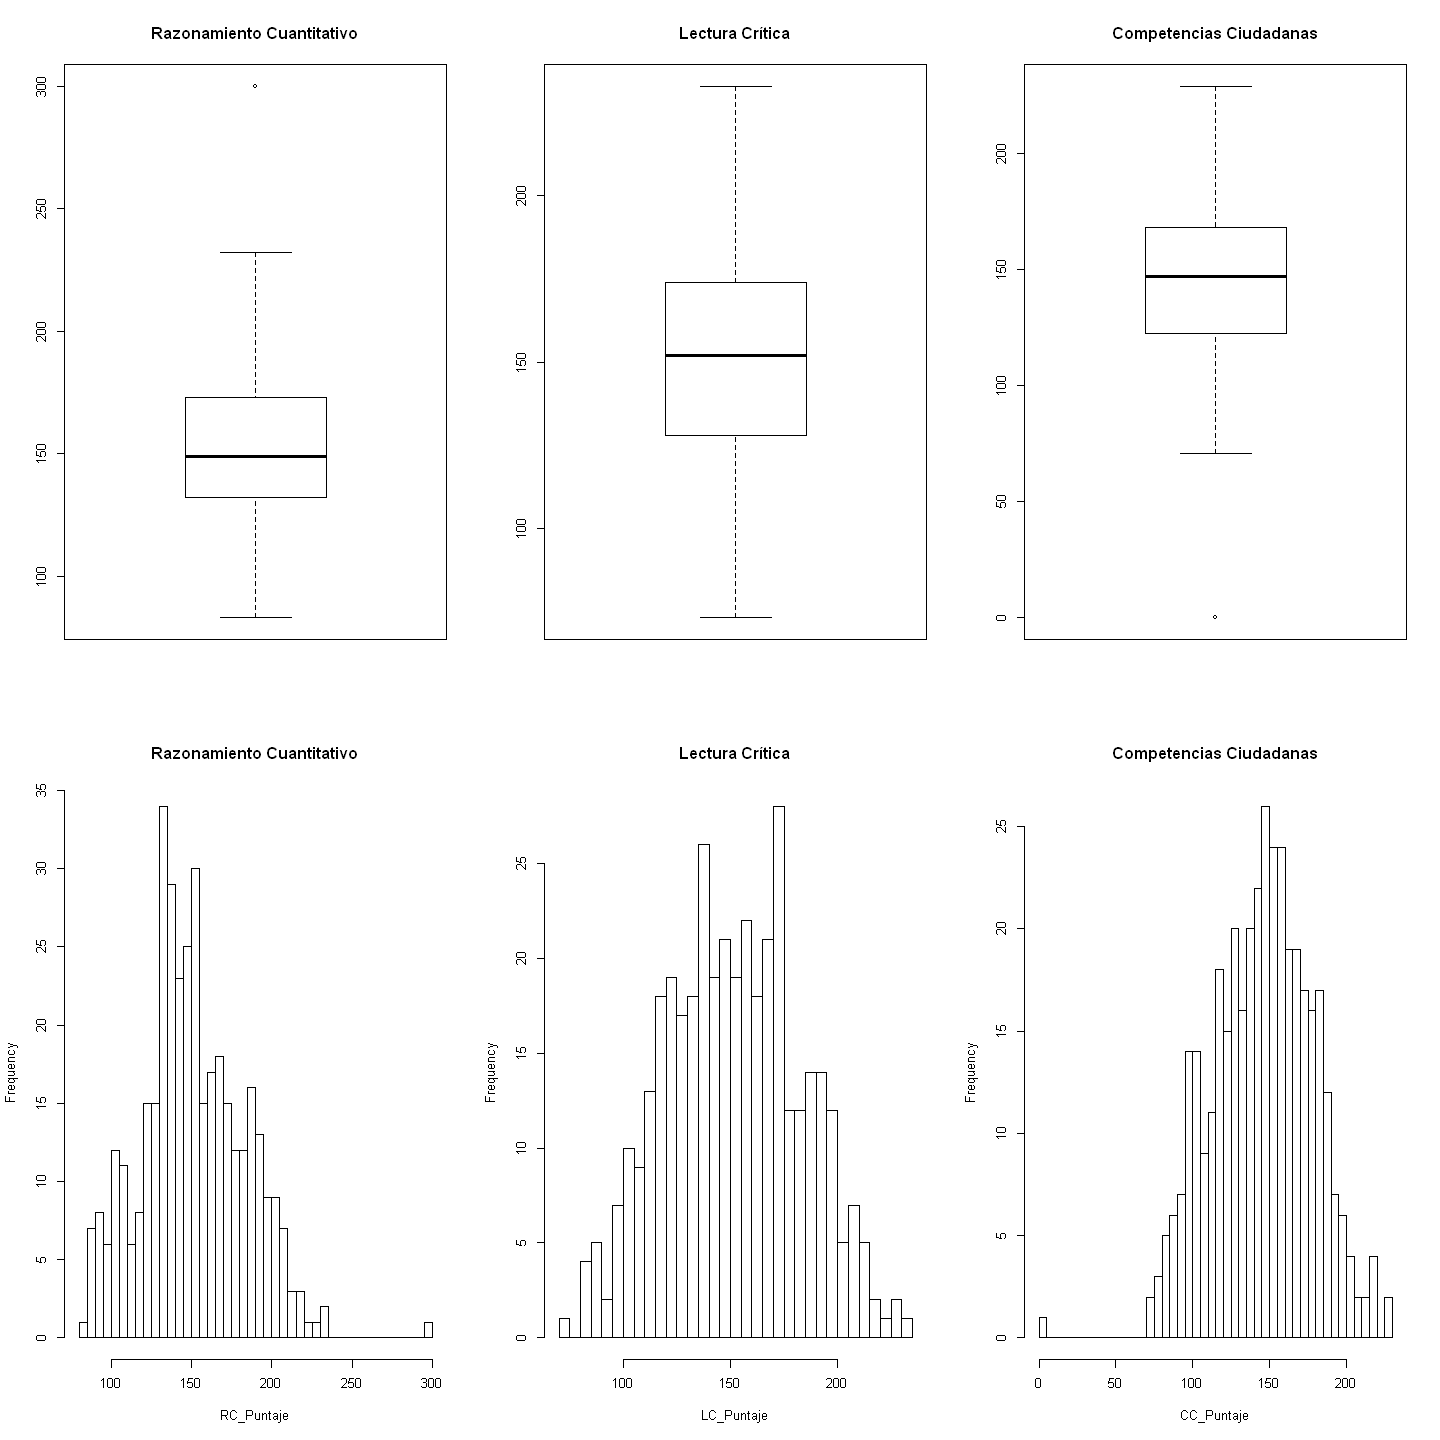

In [22]:
par(mfrow=c(2,3))

with(df[s1,], boxplot(RC_Puntaje, main = 'Razonamiento Cuantitativo'))
with(df[s1,], boxplot(LC_Puntaje, main = 'Lectura Crítica'))
with(df[s1,], boxplot(CC_Puntaje, main = 'Competencias Ciudadanas'))

with(df[s1,], hist(RC_Puntaje, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(df[s1,], hist(LC_Puntaje, nclass = 50, main = 'Lectura Crítica'))
with(df[s1,], hist(CC_Puntaje, nclass = 50, main = 'Competencias Ciudadanas'))

par(mfrow=c(1,1))

In [23]:
#Inferencias razonamiento cuantitativo
poblacion <- round(mystats(df[,'RC_Puntaje']),1)
m1 <- round(mystats(df[s1,'RC_Puntaje']),1)
m2 <- round(mystats(df[s2,'RC_Puntaje']),1)
m3 <- round(mystats(df[s3,'RC_Puntaje']),1)
data.frame(poblacion,m1,m2,m3)

#Inferencias lectura crítica
poblacion <- round(mystats(df[,'LC_Puntaje']),1)
m1 <- round(mystats(df[s1,'LC_Puntaje']),1)
m2 <- round(mystats(df[s2,'LC_Puntaje']),1)
m3 <- round(mystats(df[s3,'LC_Puntaje']),1)
data.frame(poblacion,m1,m2,m3)

#Inferencias competencias ciudadanas
poblacion <- round(mystats(df[,'CC_Puntaje']),1)
m1 <- round(mystats(df[s1,'CC_Puntaje']),1)
m2 <- round(mystats(df[s2,'CC_Puntaje']),1)
m3 <- round(mystats(df[s3,'CC_Puntaje']),1)
data.frame(poblacion,m1,m2,m3)

,poblacion,m1,m2,m3
tamaño,725295.0,384.0,663.0,1000.0
media,149.5,151.4,149.2,148.9
desviación estándar,30.7,32.3,31.3,30.5
simetría,0.2,0.3,0.3,0.2
kurtosis,0.1,0.4,0.1,0.0


,poblacion,m1,m2,m3
tamaño,725295.0,384.0,663.0,1000.0
media,150.1,151.6,149.6,149.2
desviación estándar,31.0,31.8,31.8,31.1
simetría,0.0,0.1,0.0,0.1
kurtosis,-0.3,-0.6,-0.6,-0.4


,poblacion,m1,m2,m3
tamaño,725295.0,384.0,663.0,1000.0
media,144.8,145.4,144.1,144.4
desviación estándar,32.5,32.6,32.7,32.6
simetría,-0.1,-0.2,0.1,0.0
kurtosis,0.0,0.3,0.1,-0.5


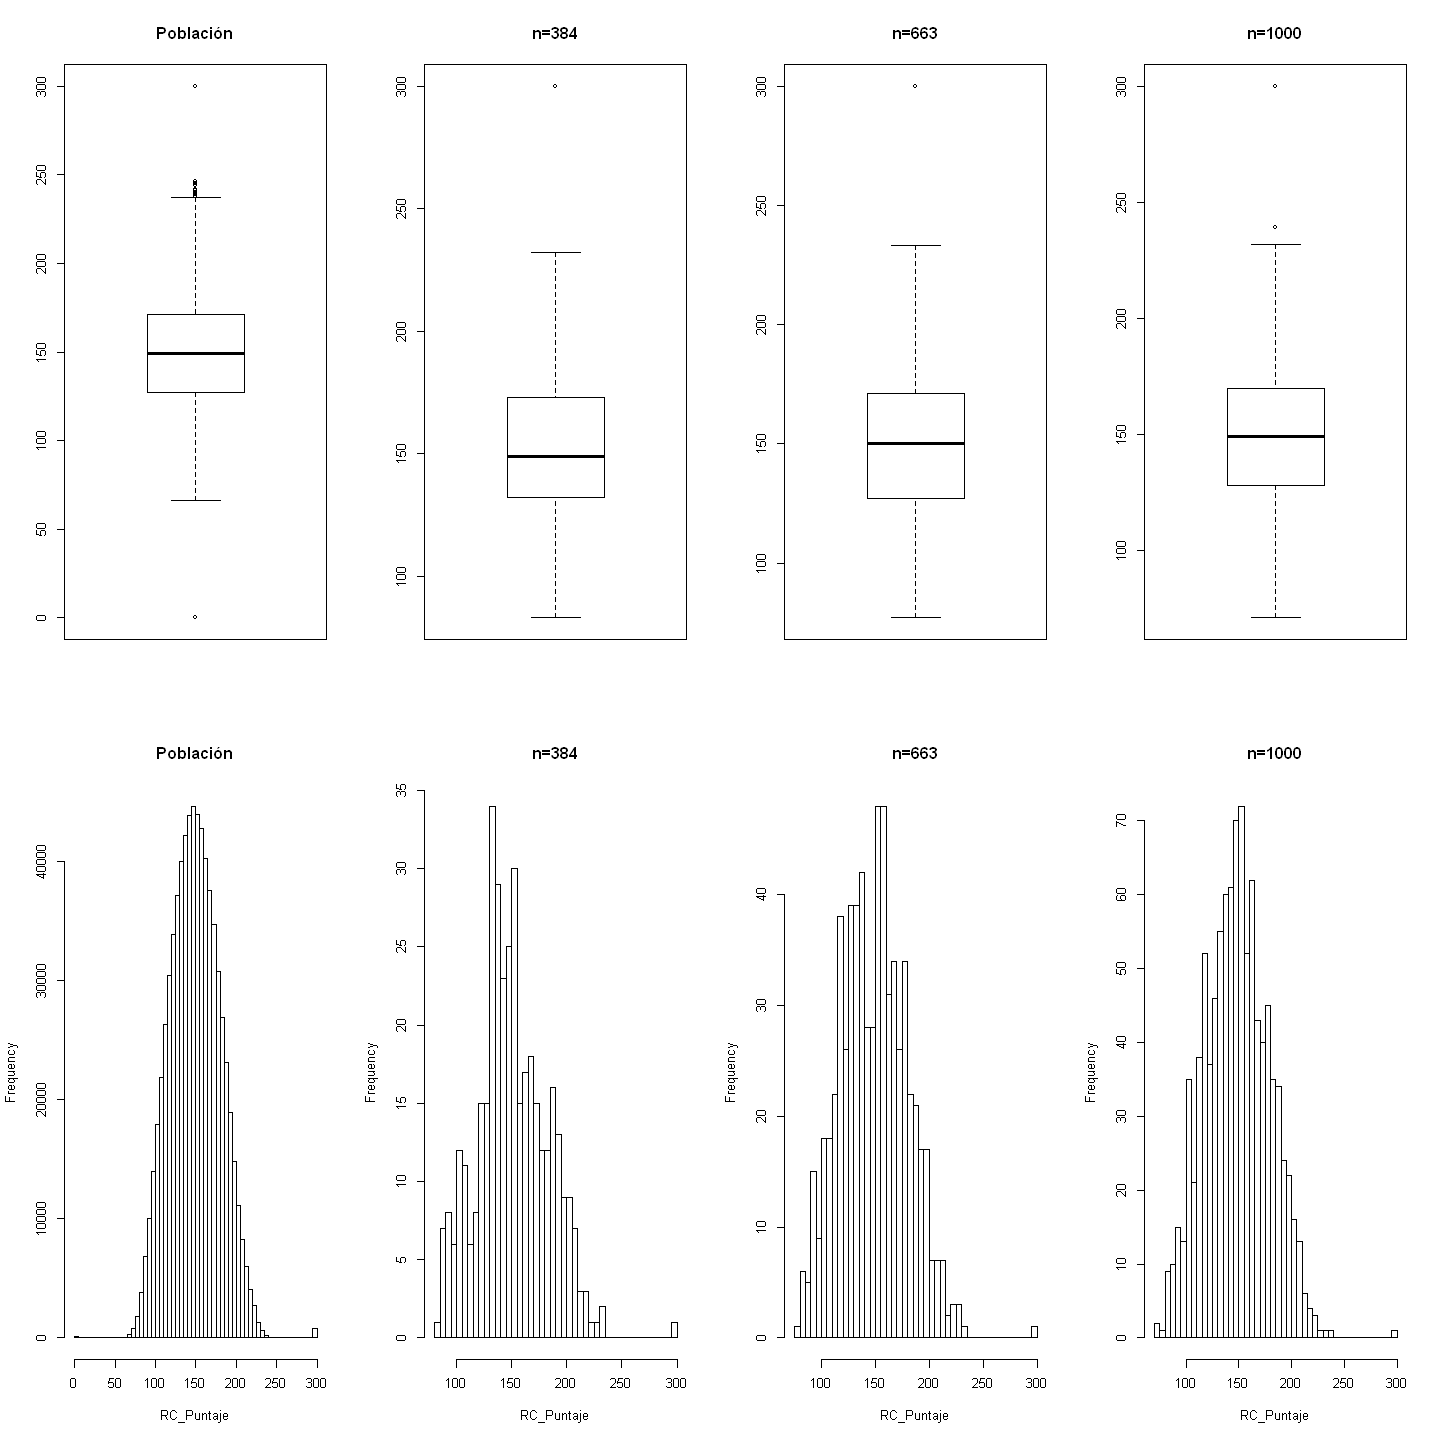

In [24]:
par(mfrow=c(2,4))
with(df, boxplot(RC_Puntaje, main = 'Población'))
with(df[s1,], boxplot(RC_Puntaje, main = 'n=384'))
with(df[s2,], boxplot(RC_Puntaje, main = 'n=663'))
with(df[s3,], boxplot(RC_Puntaje, main = 'n=1000'))
with(df, hist(RC_Puntaje, nclass = 50, main = 'Población'))
with(df[s1,], hist(RC_Puntaje, nclass = 50, main = 'n=384'))
with(df[s2,], hist(RC_Puntaje, nclass = 50, main = 'n=663'))
with(df[s3,], hist(RC_Puntaje, nclass = 50, main = 'n=1000'))
par(mfrow=c(1,1))


### Inferencias: 

Usaremos la segunda muestra para las respectivas inferencias, la cual tiene n=384 y un intervalo de confianza del 95%

In [25]:
inferencia <- function(data, n_conf){
    media <- mean(na.omit(data)) # Pedimos la media
    desv <- sd(na.omit(data)) # La desviación estándar
    N <- length(na.omit(data)) # El tamaño válido de la muestra
    error.est <- desv/sqrt(N) # Calculamos el error estándar
    error <- n_conf*error.est # Fijamos Z=2 para indicar un nivel de confianza de 95%
    lim.inf <- media-error # Límite inferior del intervalo
    lim.sup <- media+error # Límite superior del intervalo
    inferencia<- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
  return(inferencia)
}

In [26]:
print('Razonamiento Cuantitativo')
inf_RC_90<- inferencia(df[s1,]$RC_Puntaje,1.64)
round(inf_RC_90,2)
print('Lectura Crítica')
inf_LC_90<- inferencia(df[s1,]$LC_Puntaje,1.64)
round(inf_LC_90,2)
print("Competencias Ciudadanas")
inf_CC_90<- inferencia(df[s1,]$CC_Puntaje,1.64)
round(inf_CC_90,2)


[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
151.38,32.26,384,1.65,2.7,148.68,154.08


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
151.58,31.75,384,1.62,2.66,148.93,154.24


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
145.41,32.62,384,1.66,2.73,142.68,148.14


In [27]:
print('Razonamiento Cuantitativo')
inf_RC_95<- inferencia(df[s1,]$RC_Puntaje,1.96)
round(inf_RC_95,2)
print('Lectura Crítica')
inf_LC_95<- inferencia(df[s1,]$LC_Puntaje,1.96)
round(inf_LC_95,2)
print("Competencias Ciudadanas")
inf_CC_95<- inferencia(df[s1,]$CC_Puntaje,1.96)
round(inf_CC_95,2)

[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
151.38,32.26,384,1.65,3.23,148.15,154.6


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
151.58,31.75,384,1.62,3.18,148.41,154.76


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
145.41,32.62,384,1.66,3.26,142.15,148.67


In [28]:
print('Razonamiento Cuantitativo')
inf_RC_99<- inferencia(df[s1,]$RC_Puntaje,2.57)
round(inf_RC_99,2)
print('Lectura Crítica')
inf_LC_99<- inferencia(df[s1,]$LC_Puntaje,2.57)
round(inf_LC_99,2)
print("Competencias Ciudadanas")
inf_CC_99<- inferencia(df[s1,]$CC_Puntaje,2.57)
round(inf_CC_99,2)

[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
151.38,32.26,384,1.65,4.23,147.15,155.61


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
151.58,31.75,384,1.62,4.16,147.42,155.75


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
145.41,32.62,384,1.66,4.28,141.13,149.69


## Análisis 

Con los histogramas podemos observar que a medida que se aumentan la cantidad de muestras la gráfica se va haciendo más fiel a la población real, pareciéndose a una distribución normal. También, se aprecia que esta muestra de 1000 tiene los datos con una menor dispersión por lo que su desviación estándar es menor. En conclusión, a mayor número de muestras los datos deberían estar más agrupados respecto a la media.

De igual forma, podemos ver que cuando se tiene un intervalo del 95% de confianza la cantidad de la muestra por defecto (384) se asemeja en gran manera a la población completa.

Por otro lado, en las tablas podemos notar que el valor de la simetría en la muestra mayor es idéntica a la población en todos los casos, por lo que no hay ningún tipo de sesgo.

## 2. Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes

Para las variables raz_cuant_punt y raz_cuant_des:

In [29]:
EstratosRaz <- data %>%
  select(raz_cuant_punt,raz_cuant_des) %>%
  group_by(raz_cuant_des) %>%
  summarise(n=n(),
            s=sd(raz_cuant_punt)) %>%
  mutate(p=n/sum(n))
EstratosRaz

raz_cuant_des,n,s,p
Deficiente,168183,12.148419,0.23188220
Regular,234534,7.978031,0.32336360
Sobresaliente,292264,13.121279,0.40295880
Excelente,30314,15.831535,0.04179541


Para las variables lect_crit_punt y lect_crit_des:

In [30]:
EstratosLect<- data %>%
  select(lect_crit_punt,lect_crit_des) %>%
  group_by(lect_crit_des) %>%
  summarise(n=n(),
            s=sd(lect_crit_punt)) %>%
  mutate(p=n/sum(n))
EstratosLect

lect_crit_des,n,s,p
Deficiente,157557,12.949062,0.21723161
Regular,270686,9.385729,0.37320814
Sobresaliente,255418,11.562116,0.35215740
Excelente,41634,10.098844,0.05740285


Para las variables comp_ciud_punt y comp_ciud_des:

In [31]:
EstratosCiud<- data %>%
  select(comp_ciud_punt,comp_ciud_des) %>%
  group_by(comp_ciud_des) %>%
  summarise(n=n(),
            s=sd(comp_ciud_punt)) %>%
  mutate(p=n/sum(n))
EstratosCiud

comp_ciud_des,n,s,p
Deficiente,202064,15.354723,0.27859561
Regular,248924,9.157064,0.34320380
Sobresaliente,246438,11.539646,0.33977623
Excelente,27869,13.287947,0.03842437


In [32]:
nsizeProp384RC<-nstrata(n=384,wh=EstratosRaz[,4],method="proportional")
data.frame(des=EstratosRaz$raz_cuant_des,nsizeProp384RC)

des,p
Deficiente,90
Regular,125
Sobresaliente,155
Excelente,17


In [33]:
nsizeProp384LC<-nstrata(n=384,wh=EstratosLect[,4],method="proportional")
data.frame(des=EstratosLect$lect_crit_des,nsizeProp384LC)

des,p
Deficiente,84
Regular,144
Sobresaliente,136
Excelente,23


In [34]:
nsizeProp384CC<-nstrata(n=384,wh=EstratosCiud[,4],method="proportional")
data.frame(des=EstratosCiud$comp_ciud_des,nsizeProp384CC)

des,p
Deficiente,107
Regular,132
Sobresaliente,131
Excelente,15


In [35]:
muestra_deficienteRC<- sample(1:nrow(data[data$raz_cuant_des=='Deficiente',]),size=90,replace=FALSE)
muestra_regularRC<- sample(1:nrow(data[data$raz_cuant_des=='Regular',]),size=125,replace=FALSE)
muestra_sobresalienteRC<- sample(1:nrow(data[data$raz_cuant_des=='Sobresaliente',]),size=155,replace=FALSE)
muestra_excelenteRC<- sample(1:nrow(data[data$raz_cuant_des=='Excelente',]),size=17,replace=FALSE)

mestratoRC<-c(muestra_deficienteRC,muestra_regularRC,muestra_sobresalienteRC,muestra_excelenteRC)

muestra_deficienteLC<- sample(1:nrow(data[data$lect_crit_des=='Deficiente',]),size=84,replace=FALSE)
muestra_regularRC<- sample(1:nrow(data[data$lect_crit_des=='Regular',]),size=144,replace=FALSE)
muestra_sobresalienteLC<- sample(1:nrow(data[data$lect_crit_des=='Sobresaliente',]),size=136,replace=FALSE)
muestra_excelenteLC<- sample(1:nrow(data[data$lect_crit_des=='Excelente',]),size=23,replace=FALSE)

mestratoLC<-c(muestra_deficienteLC,muestra_regularRC,muestra_sobresalienteLC,muestra_excelenteLC)

muestra_deficienteCC<- sample(1:nrow(data[data$comp_ciud_des=='Deficiente',]),size=107,replace=FALSE)
muestra_regularCC<- sample(1:nrow(data[data$comp_ciud_des=='Regular',]),size=132,replace=FALSE)
muestra_sobresalienteCC<- sample(1:nrow(data[data$comp_ciud_des=='Sobresaliente',]),size=131,replace=FALSE)
muestra_excelenteCC<- sample(1:nrow(data[data$comp_ciud_des=='Excelente',]),size=15,replace=FALSE)

mestratoCC<-c(muestra_deficienteCC,muestra_regularCC,muestra_sobresalienteCC,muestra_excelenteCC)

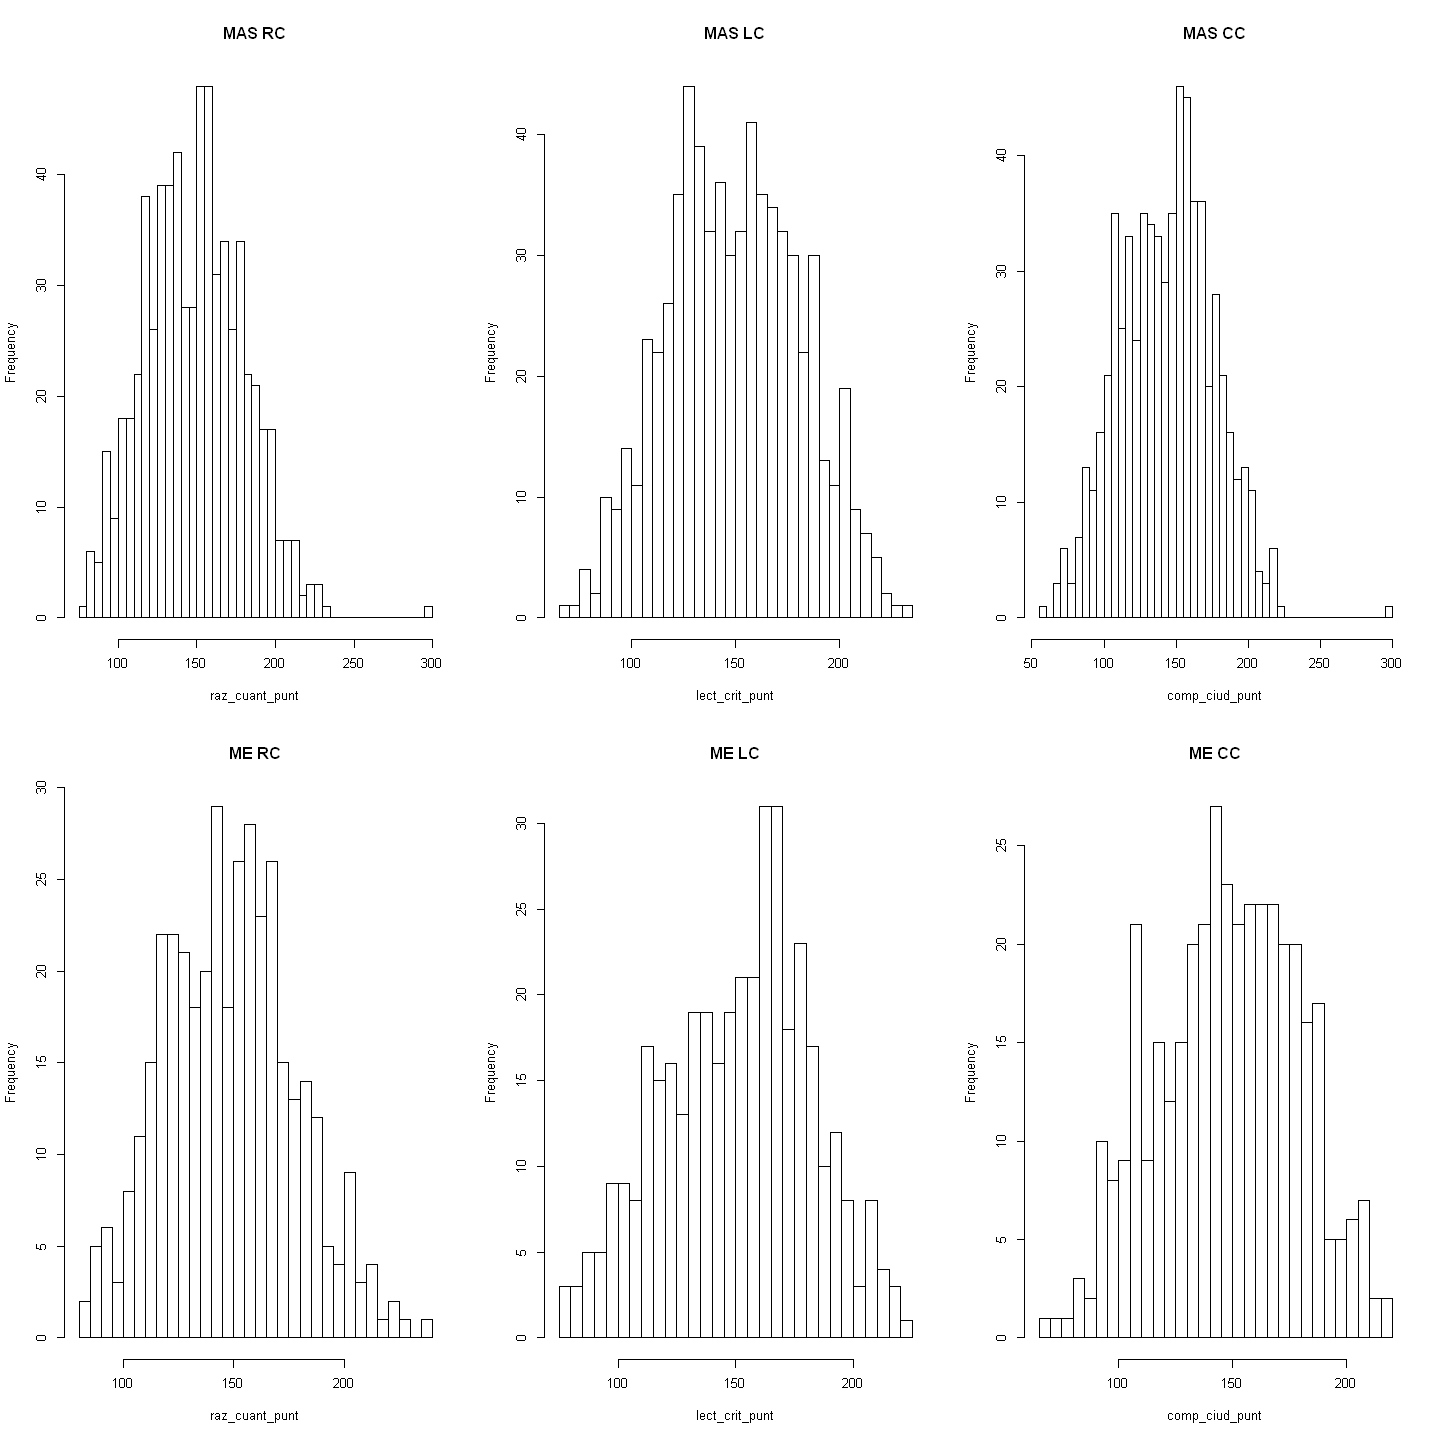

In [36]:
par(mfrow=c(2,3))
with(data[s2,], hist(raz_cuant_punt, nclass = 50, main = 'MAS RC'))
with(data[s2,], hist(lect_crit_punt, nclass = 50, main = 'MAS LC'))
with(data[s2,], hist(comp_ciud_punt, nclass = 50, main = 'MAS CC'))

with(data[mestratoRC,], hist(raz_cuant_punt, nclass = 50, main = 'ME RC'))
with(data[mestratoLC,], hist(lect_crit_punt, nclass = 50, main = 'ME LC'))
with(data[mestratoCC,], hist(comp_ciud_punt, nclass = 50, main = 'ME CC'))
par(mfrow=c(1,1))

In [37]:
estrato_RC<-data[mestratoRC,]
estrato_LC<-data[mestratoLC,]
estrato_CC<-data[mestratoCC,]

In [38]:
infme_RC90<- inferencia(estrato_RC$raz_cuant_punt,1.64)
round(infme_RC90,2)

infme_LC90<-inferencia(estrato_LC$lect_crit_punt,1.64)
round(infme_LC90,2)

infme_CC90<-inferencia(estrato_CC$comp_ciud_punt,1.64)
round(infme_CC90,2)

media,desv,N,error.est,error,lim.inf,lim.sup
148.76,29.51,387,1.5,2.46,146.3,151.22


media,desv,N,error.est,error,lim.inf,lim.sup
151.18,31.12,387,1.58,2.59,148.58,153.77


media,desv,N,error.est,error,lim.inf,lim.sup
148.48,30.71,385,1.57,2.57,145.91,151.04


In [39]:
infme_RC95<- inferencia(estrato_RC$raz_cuant_punt,1.96)
round(infme_RC95,2)

infme_LC95<-inferencia(estrato_LC$lect_crit_punt,1.96)
round(infme_LC95,2)

infme_CC95<-inferencia(estrato_CC$comp_ciud_punt,1.96)
round(infme_CC95,2)

media,desv,N,error.est,error,lim.inf,lim.sup
148.76,29.51,387,1.5,2.94,145.82,151.7


media,desv,N,error.est,error,lim.inf,lim.sup
151.18,31.12,387,1.58,3.1,148.08,154.28


media,desv,N,error.est,error,lim.inf,lim.sup
148.48,30.71,385,1.57,3.07,145.41,151.55


In [40]:
infme_RC99<- inferencia(estrato_RC$raz_cuant_punt,2.57)
round(infme_RC99,2)

infme_LC99<-inferencia(estrato_LC$lect_crit_punt,2.57)
round(infme_LC99,2)

infme_CC99<-inferencia(estrato_CC$comp_ciud_punt,2.57)
round(infme_CC99,2)

media,desv,N,error.est,error,lim.inf,lim.sup
148.76,29.51,387,1.5,3.86,144.9,152.62


media,desv,N,error.est,error,lim.inf,lim.sup
151.18,31.12,387,1.58,4.07,147.11,155.24


media,desv,N,error.est,error,lim.inf,lim.sup
148.48,30.71,385,1.57,4.02,144.46,152.5


## Análisis

Gracias a las tablas podemos observar que la asignatura que peor les fue, en todos los periodos, fue la de competencias ciudadanas, con 202064 deficientes en toda la población. 

La diferencia principal entre los resultados obtenidos en el Muestreo Aleatorio Simple (MAS) y el Muestreo Estratificado (ME) es que en el primero se escogía una muestra de manera aleatoria sin tener en cuenta ninguna característica de la población, y en el segundo se escogieron a las categorías de las notas de las asignaturas (deficiente, regular, sobresaliente y excelente) como el respectivo estrato a seguir y se logró que todos esos estratos estuvieran representados de manera adecuada en la muestra.

De igual forma, el ME permite que la muestra abarque los datos de manera más homogénea y se tenga en cuenta cierta información que con el MAS no se podía.

## 3. Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes

In [41]:
datos_Congl<-data.frame(Depto=data$estu_depto_reside
                    ,PuntosComp=data$comp_ciud_punt
                    ,PuntosIng=data$ingles_punt, PuntosLC=data$lect_crit_punt,
                     PuntosRC=data$raz_cuant_punt,PuntosCE=data$comu_escr_punt)

In [42]:
unique(datos_Congl$Depto) # Miramos cuántos departamentos hay


[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARINO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

In [43]:
Conglomerados <- datos_Congl %>% ## Para las variables departamento y razonamiento cuantitativo
  select(Depto, PuntosRC) %>%
  group_by(Depto) %>%
  summarise(n=n(), 
            s=sd(PuntosRC)) %>%
  mutate(p=n/sum(n))

head(Conglomerados)

Depto,n,s,p
,1997,30.86974,0.0027533624
AMAZONAS,195,29.87807,0.0002688561
ANTIOQUIA,86465,32.25236,0.1192135614
ARAUCA,1863,26.66001,0.0025686100
ATLANTICO,41127,30.34594,0.0567038240
BOGOTA,210798,30.12218,0.2906376026


In [44]:
nsProp384<-nstrata(n=384,wh=Conglomerados[,4],method="proportional")

In [45]:
data.frame(des=Conglomerados$Depto,nsProp384)

des,p
,2
AMAZONAS,1
ANTIOQUIA,46
ARAUCA,1
ATLANTICO,22
BOGOTA,112
BOLIVAR,13
BOYACA,10
CALDAS,8
CAQUETA,3


In [46]:
num_AMAZONAS<-1 # Número de estudiantes en AMAZONAS
meAMAZONAS_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='AMAZONAS',]),size=num_AMAZONAS,replace=FALSE)

num_ANTIOQUIA<-46 # Número de estudiantes en ANTIOQUIA
meANTIOQUIA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='ANTIOQUIA',]),size=num_ANTIOQUIA,replace=FALSE)

num_ARAUCA<-1 # Número de estudiantes en ARAUCA
meARAUCA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='ARAUCA',]),size=num_ARAUCA,replace=FALSE)

num_ATLANTICO<-22 # Número de estudiantes en ATLANTICO
meATLANTICO_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='ATLANTICO',]),size=num_ATLANTICO,replace=FALSE)

num_BOGOTA<-112 # Número de estudiantes en BOGOTA
meBOGOTA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='BOGOTA',]),size=num_BOGOTA,replace=FALSE)

num_BOLIVAR<-13 # Número de estudiantes en BOLIVAR
meBOLIVAR_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='BOLIVAR',]),size=num_BOLIVAR,replace=FALSE)

num_BOYACA<-10 # Número de estudiantes en BOYACA
meBOYACA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='BOYACA',]),size=num_BOYACA,replace=FALSE)

num_CALDAS<-8 # Número de estudiantes en CALDAS
meCALDAS_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CALDAS',]),size=num_CALDAS,replace=FALSE)

num_CAQUETA<-3 # Número de estudiantes en CAQUETA
meCAQUETA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CAQUETA',]),size=num_CAQUETA,replace=FALSE)

num_CASANARE<-2 # Número de estudiantes en CASANARE
meCASANARE_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CASANARE',]),size=num_CASANARE,replace=FALSE)

num_CAUCA<-9 # Número de estudiantes en CAUCA
meCAUCA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CAUCA',]),size=num_CAUCA,replace=FALSE)

num_CESAR<-6 # Número de estudiantes en CESAR
meCESAR_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CESAR',]),size=num_CESAR,replace=FALSE)

num_CHOCO<-3 # Número de estudiantes en CHOCO
meCHOCO_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CHOCO',]),size=num_CHOCO,replace=FALSE)

num_CORDOBA<-10 # Número de estudiantes en CORDOBA
meCORDOBA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CORDOBA',]),size=num_CORDOBA,replace=FALSE)

num_CUNDINAMARCA<-21 # Número de estudiantes en CUNDINAMARCA
meCUNDINAMARCA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='CUNDINAMARCA',]),size=num_CUNDINAMARCA,replace=FALSE)

num_EXTRANJERO<-1 # Número de estudiantes en EXTRANJERO
meEXTRANJERO_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='EXTRANJERO',]),size=num_EXTRANJERO,replace=FALSE)

num_GUAINIA<-1 # Número de estudiantes en GUAINIA
meGUAINIA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='GUAINIA',]),size=num_GUAINIA,replace=FALSE)

num_GUAVIARE<-1 # Número de estudiantes en GUAVIARE
meGUAVIARE_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='GUAVIARE',]),size=num_GUAVIARE,replace=FALSE)

num_HUILA<-8 # Número de estudiantes en HUILA
meHUILA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='HUILA',]),size=num_HUILA,replace=FALSE)

num_GUAJIRA<-4 # Número de estudiantes en GUAJIRA
meGUAJIRA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='LA GUAJIRA',]),size=num_GUAJIRA,replace=FALSE)

num_MAGDALENA<-6 # Número de estudiantes en MAGDALENA
meMAGDALENA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='MAGDALENA',]),size=num_MAGDALENA,replace=FALSE)

num_META<-8 # Número de estudiantes en META
meMETA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='META',]),size=num_META,replace=FALSE)

num_NARINO<-9 # Número de estudiantes en NARINO
meNARINO_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='NARINO',]),size=num_NARINO,replace=FALSE)

num_NORTE_SANTANDER<-12 # Número de estudiantes en NORTE_SANTANDER
meNORTE_SANTANDER_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='NORTE SANTANDER',]),size=num_NORTE_SANTANDER,replace=FALSE)

num_PUTUMAYO<-2 # Número de estudiantes en PUTUMAYO
mePUTUMAYO_cong<- sample(1:nrow(datos_Congl[datos_Congl$departamento=='PUTUMAYO',]),size=num_PUTUMAYO,replace=FALSE)

num_QUINDIO<-5 # Número de estudiantes en QUINDIO
meQUINDIO_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='QUINDIO',]),size=num_QUINDIO,replace=FALSE)

num_RISARALDA<-9 # Número de estudiantes en RISARALDA
meRISARALDA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='RISARALDA',]),size=num_RISARALDA,replace=FALSE)

num_SAN_ANDRES<-1 # Número de estudiantes en SAN_ANDRES
meSAN_ANDRES_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='SAN ANDRES',]),size=num_SAN_ANDRES,replace=FALSE)

num_SANTANDER<-20 # Número de estudiantes en SANTANDER
meSANTANDER_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='SANTANDER',]),size=num_SANTANDER,replace=FALSE)

num_SUCRE<-6 # Número de estudiantes en SUCRE
meSUCRE_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='SUCRE',]),size=num_SUCRE,replace=FALSE)

num_TOLIMA<-10 # Número de estudiantes en TOLIMA
meTOLIMA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='TOLIMA',]),size=num_TOLIMA,replace=FALSE)

num_VALLE<-30 # Número de estudiantes en VALLE
meVALLE_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='VALLE',]),size=num_VALLE,replace=FALSE)

num_VAUPES<-1 # Número de estudiantes en VAUPES
meVAUPES_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='VAUPES',]),size=num_VAUPES,replace=FALSE)

num_VICHADA<-1 # Número de estudiantes en VICHADA
meVICHADA_cong<- sample(1:nrow(datos_Congl[datos_Congl$Depto=='VICHADA',]),size=num_VICHADA,replace=FALSE)

muestra_cong<-c( meAMAZONAS_cong,meANTIOQUIA_cong,meARAUCA_cong,meATLANTICO_cong,meBOGOTA_cong,meBOLIVAR_cong,meBOYACA_cong,meCALDAS_cong,meCAQUETA_cong,meCASANARE_cong,meCAUCA_cong,meCESAR_cong,meCHOCO_cong,meCORDOBA_cong,meCUNDINAMARCA_cong,meEXTRANJERO_cong,meGUAINIA_cong,meGUAVIARE_cong,meHUILA_cong,meGUAJIRA_cong,meMAGDALENA_cong,meMETA_cong,meNARINO_cong,meNORTE_SANTANDER_cong,mePUTUMAYO_cong,meQUINDIO_cong,meRISARALDA_cong,meSAN_ANDRES_cong,meSANTANDER_cong,meSUCRE_cong,meTOLIMA_cong,meVALLE_cong,meVAUPES_cong,meVICHADA_cong) # Unimos los tres vectores                                                                       

SC <- datos_Congl[muestra_cong,]
head(SC)

,Depto,PuntosComp,PuntosIng,PuntosLC,PuntosRC,PuntosCE
175,VALLE,185,127,180,189,163
79819,BOGOTA,126,217,227,103,125
77910,BOGOTA,142,171,148,183,157
19717,ANTIOQUIA,164,122,139,170,156
4893,BOGOTA,174,182,199,218,158
53723,BOGOTA,143,146,149,144,78


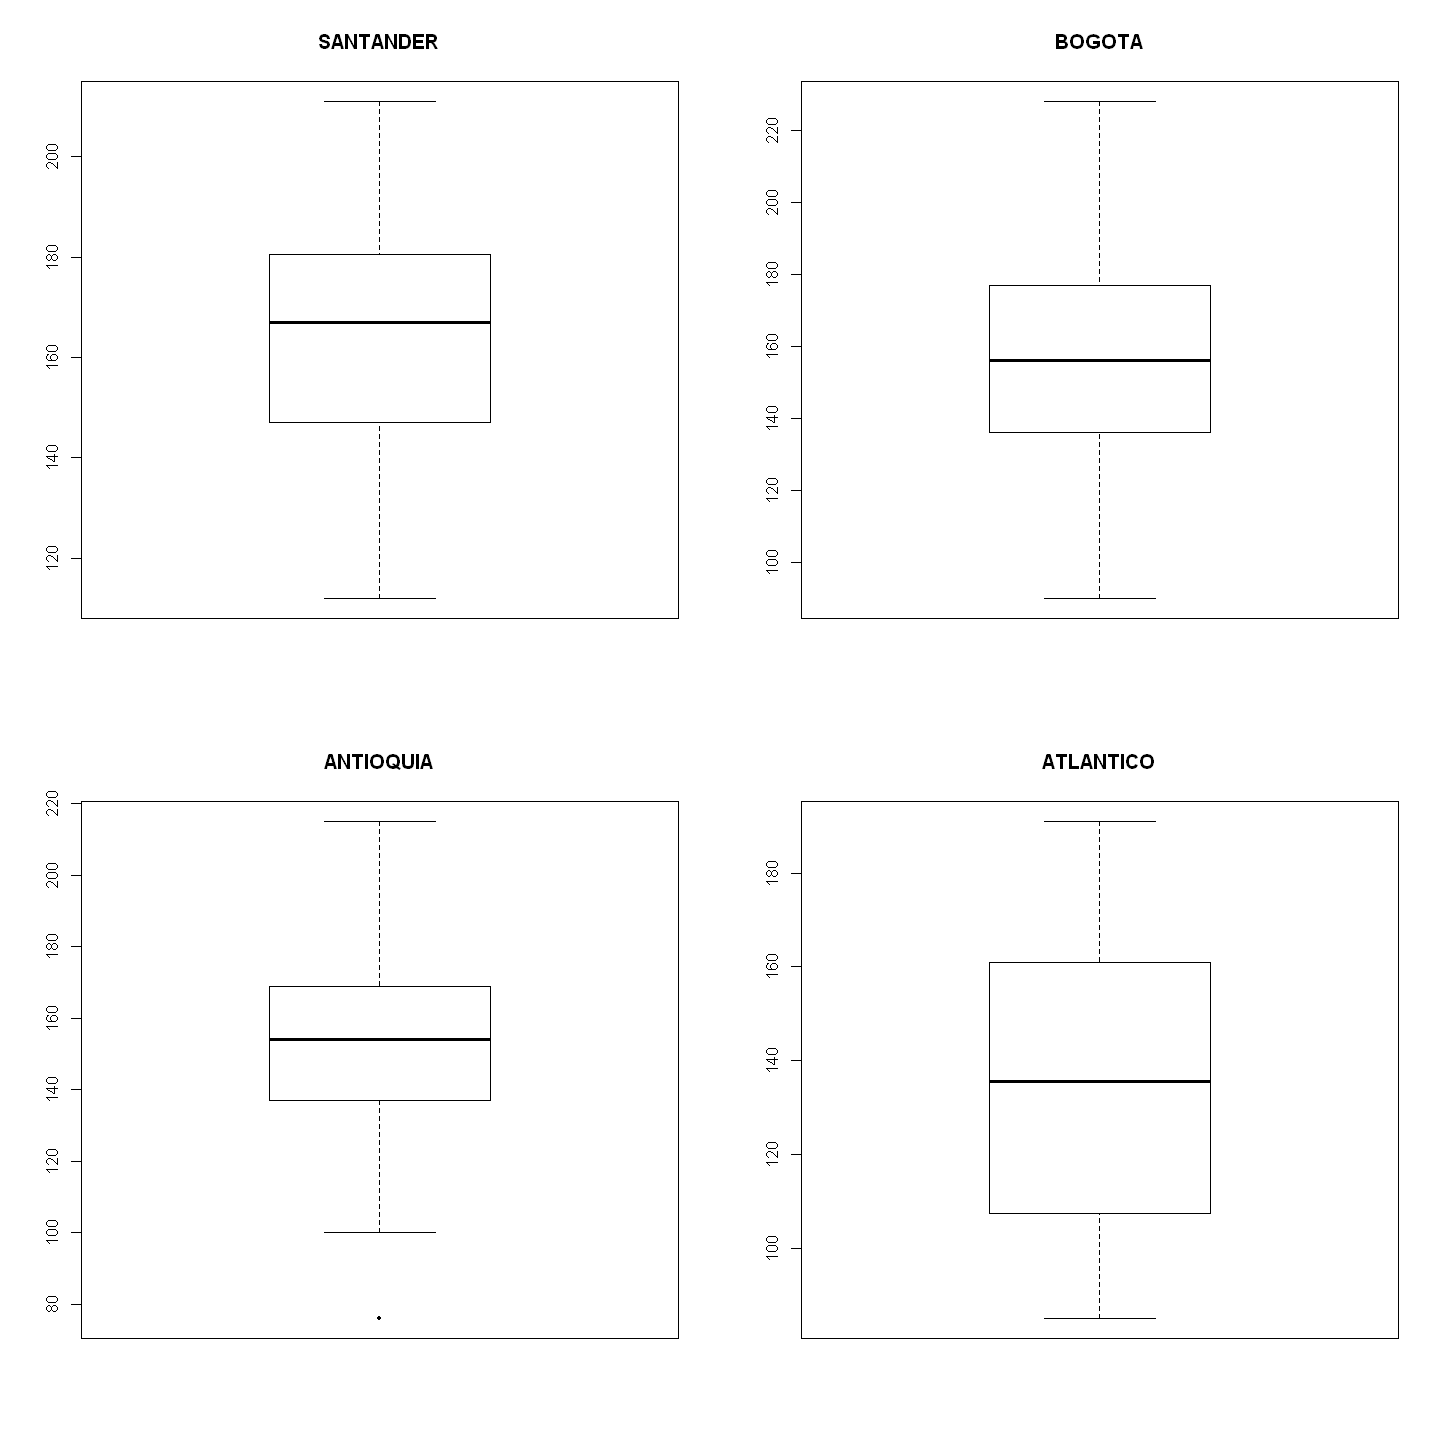

In [49]:
datos_Santander<-SC[SC$Depto=="SANTANDER",]
datos_Bog<-SC[SC$Depto=="BOGOTA",]
datos_Antioquia<-SC[SC$Depto=="ANTIOQUIA",]
datos_Atlantico<-SC[SC$Depto=="ATLANTICO",]
#Procedemos a realizar el diagrama de Cajas
par(mfrow=c(2,2))
with(datos_Santander, boxplot(PuntosLC, pch = 20, main = 'SANTANDER'))
with(datos_Bog, boxplot(PuntosLC, pch = 20, main = 'BOGOTA'))
with(datos_Antioquia, boxplot(PuntosLC, pch = 20, main = 'ANTIOQUIA'))
with(datos_Atlantico, boxplot(PuntosLC, pch = 20, main = 'ATLANTICO'))

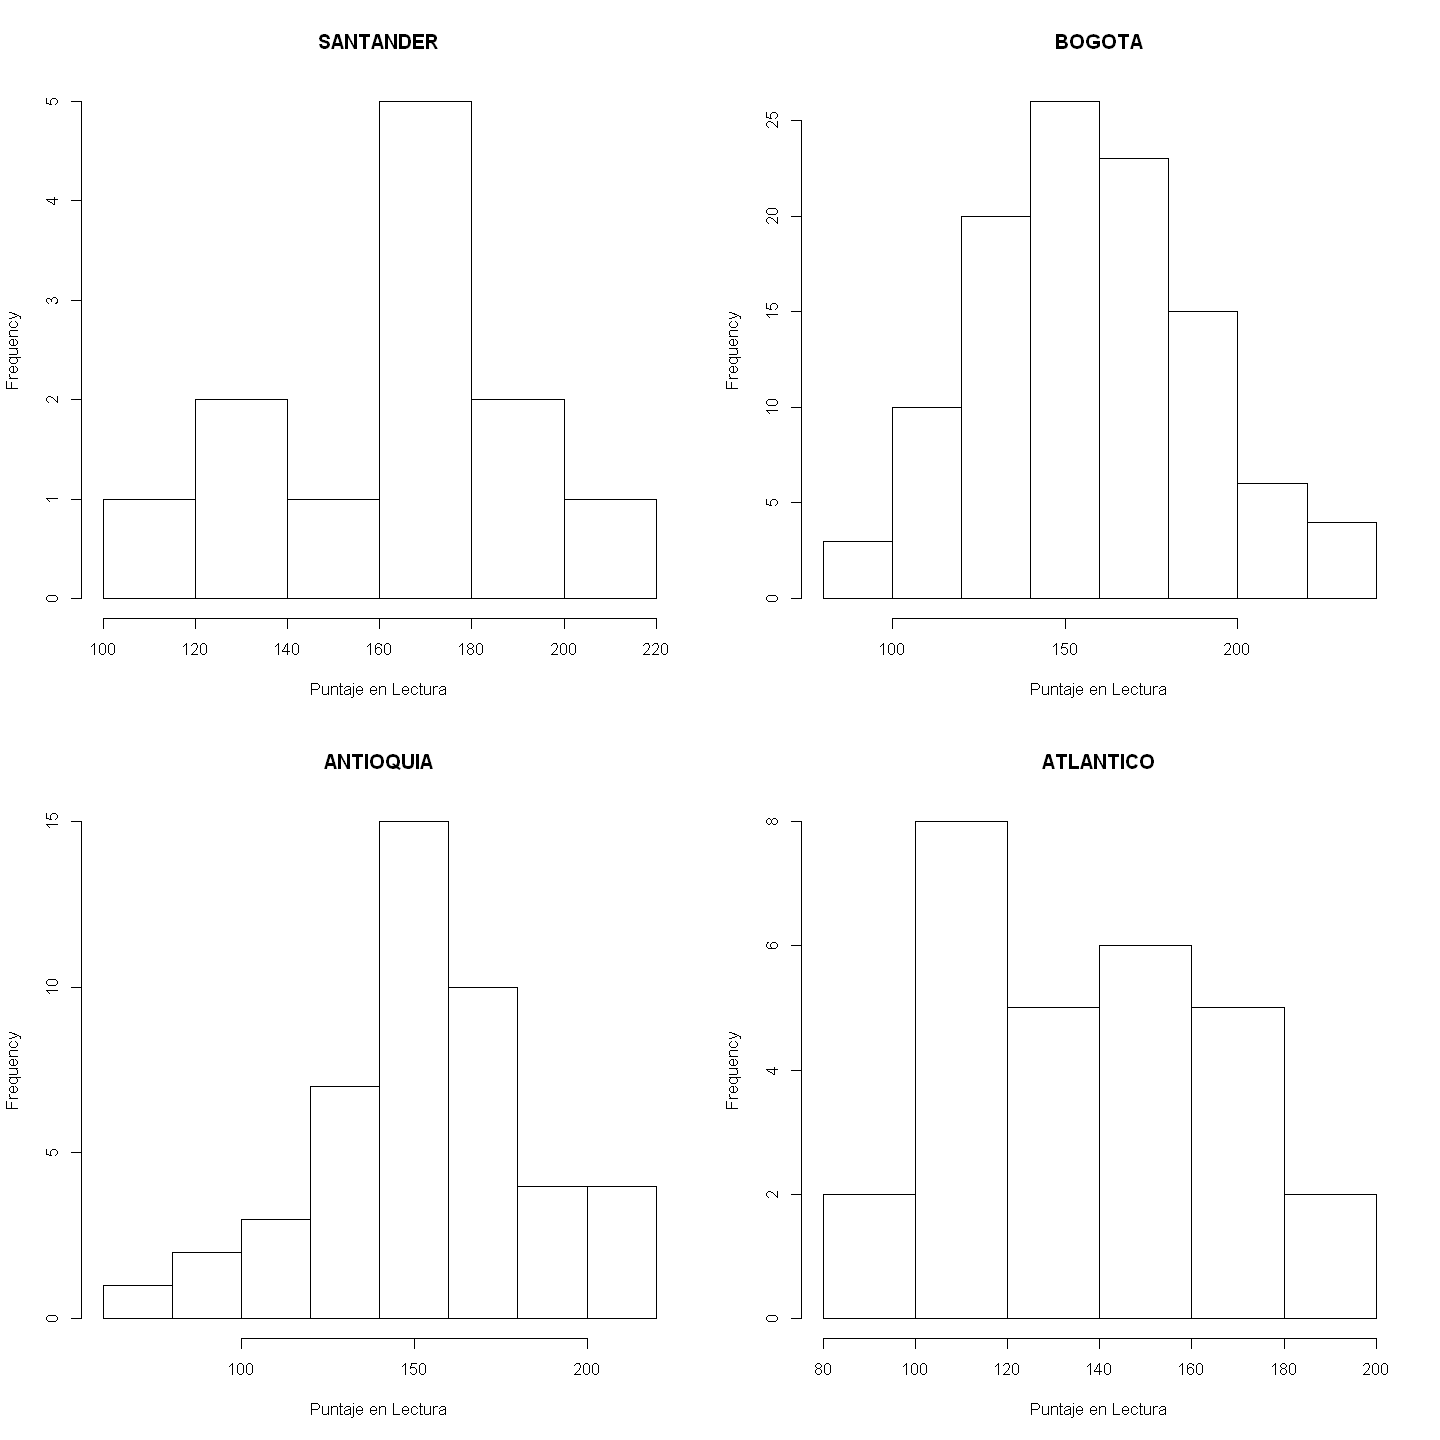

In [50]:
par(mfrow=c(2,2))
with(datos_Santander, hist(PuntosLC, main = 'SANTANDER',xlab="Puntaje en Lectura"))
with(datos_Bog, hist(PuntosLC, main = 'BOGOTA',xlab="Puntaje en Lectura"))
with(datos_Antioquia, hist(PuntosLC, main = 'ANTIOQUIA',xlab="Puntaje en Lectura"))
with(datos_Atlantico, hist(PuntosLC, main = 'ATLANTICO',xlab="Puntaje en Lectura"))

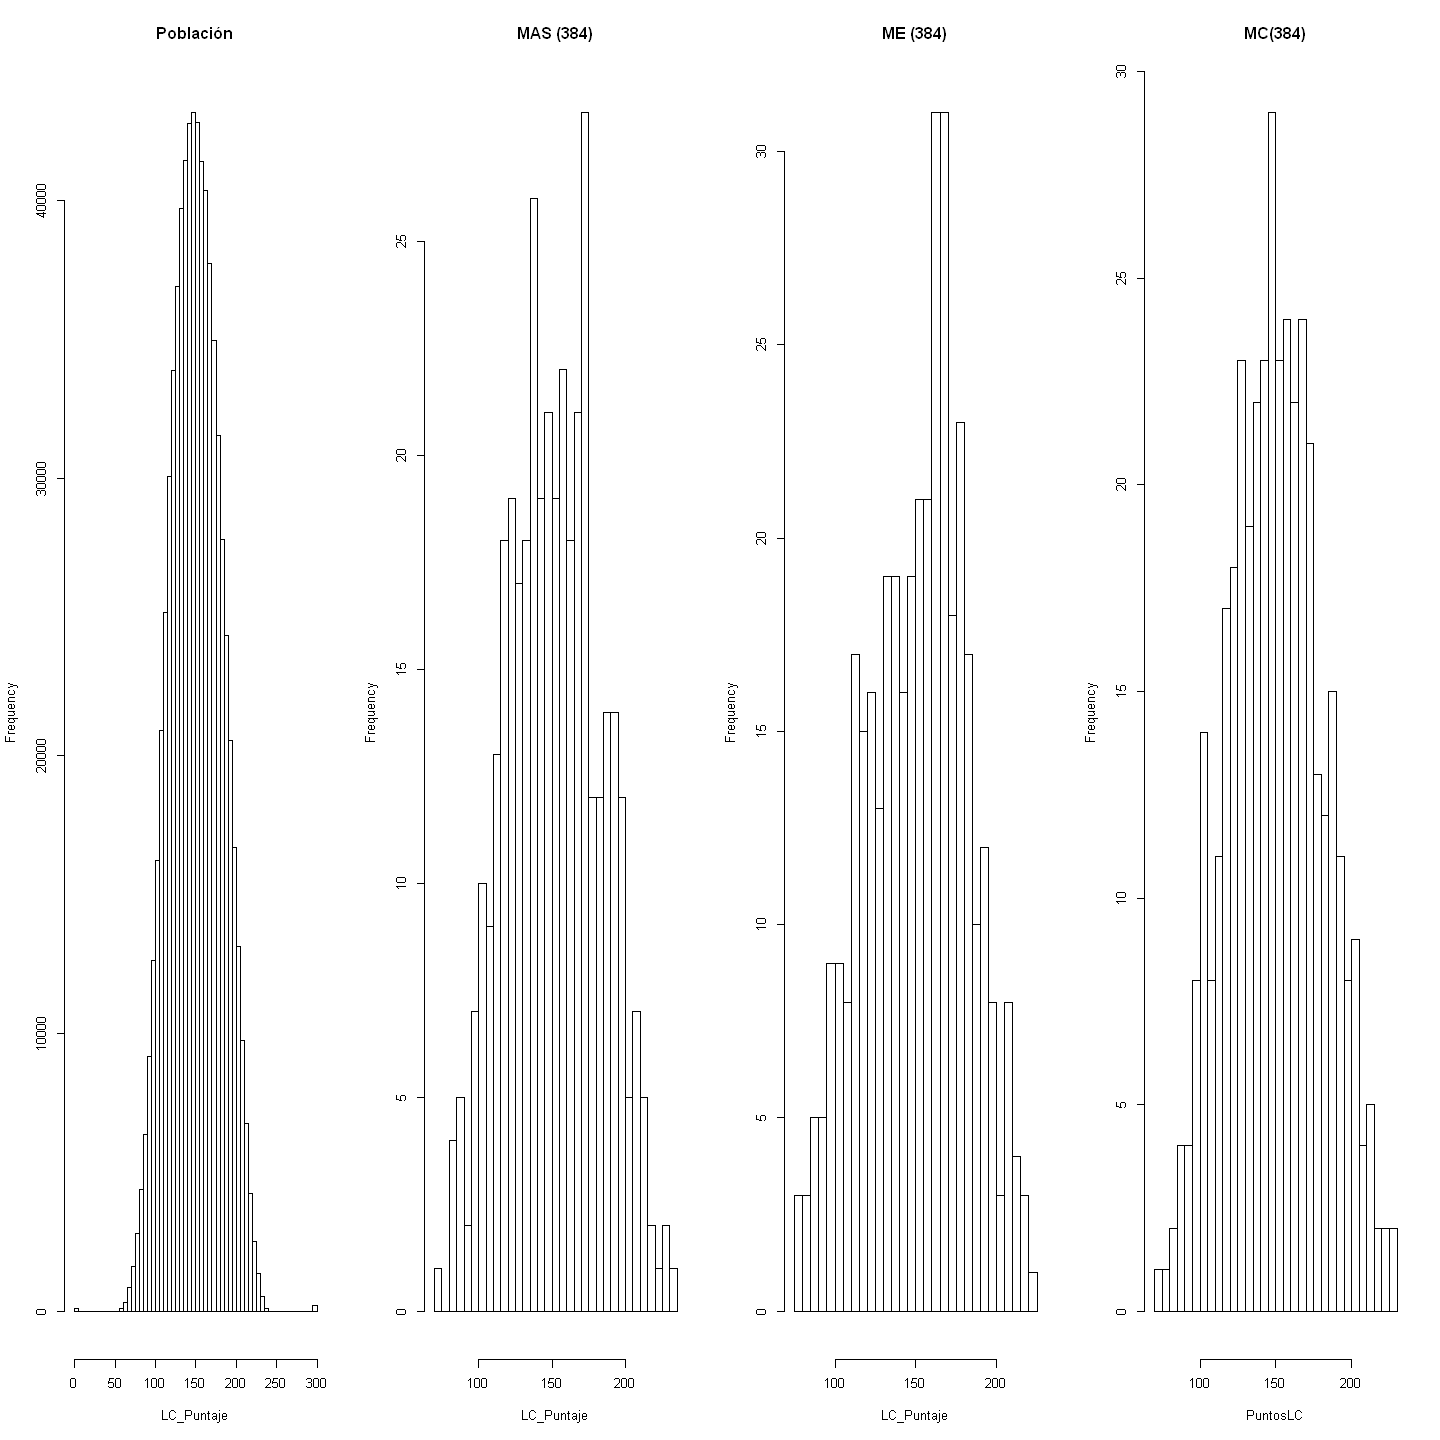

In [52]:
par(mfrow=c(1,4))


with(df, hist(LC_Puntaje, nclass = 50, main = 'Población'))
with(df[s1,], hist(LC_Puntaje, nclass = 50, main = 'MAS (384)'))
with(df[mestratoLC,], hist(LC_Puntaje, nclass = 50, main = 'ME (384)'))
with(SC,hist(PuntosLC, nclass = 50, main = 'MC(384)'))

In [53]:
#MAS n=384
#Para razonamiento cuantitativo
poblacion <- round(mystats(df[,'RC_Puntaje']),4)
MAS <- round(mystats(df[s1,'RC_Puntaje']),4)
ME <- round(mystats(df[mestratoRC,'RC_Puntaje']),4)
MC <- round(mystats(df[muestra_cong,'RC_Puntaje']),4)
data.frame(poblacion,MAS,ME,MC)

#Para lectura crítica
poblacion <- round(mystats(df[,'LC_Puntaje']),4)
MAS <- round(mystats(df[s1,'LC_Puntaje']),4)
ME <- round(mystats(df[mestratoLC,'LC_Puntaje']),4)
MC <- round(mystats(df[muestra_cong,'LC_Puntaje']),4)
data.frame(poblacion,MAS,ME,MC)

#Para competencias ciudadanas
poblacion <- round(mystats(df[,'CC_Puntaje']),4)
MAS <- round(mystats(df[s1,'CC_Puntaje']),4)
ME <- round(mystats(df[mestratoCC,'CC_Puntaje']),4)
MC <- round(mystats(df[muestra_cong,'CC_Puntaje']),4)
data.frame(poblacion,MAS,ME,MC)

,poblacion,MAS,ME,MC
tamaño,725295.0000,384.0000,387.0000,401.0000
media,149.4512,151.3776,148.7597,150.4090
desviación estándar,30.6923,32.2601,29.5134,30.7014
simetría,0.1637,0.3389,0.1878,0.1929
kurtosis,0.0840,0.4272,-0.3112,-0.6082


,poblacion,MAS,ME,MC
tamaño,725295.0000,384.0000,387.0000,401.0000
media,150.1223,151.5833,151.1783,150.5536
desviación estándar,30.9895,31.7533,31.1231,30.7792
simetría,0.0245,0.0509,-0.1563,0.0661
kurtosis,-0.2912,-0.5824,-0.5873,-0.4813


,poblacion,MAS,ME,MC
tamaño,725295.0000,384.0000,385.0000,401.0000
media,144.7592,145.4115,148.4779,151.0648
desviación estándar,32.4643,32.6191,30.7116,29.4962
simetría,-0.0732,-0.2181,-0.1201,-0.1638
kurtosis,-0.0420,0.2781,-0.6040,-0.5277


## 4. ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta 

Consideramos pertinente realizarlo debido a que nos permite que la totalidad de los datos sean tenidos en cuenta, además que en este caso tenemos los datos organizados por años (2016,2017,2018) por lo que obtendríamos información de todos los periodos.

## 5. Realice el correspondiente muestreo y compare con los anteriores

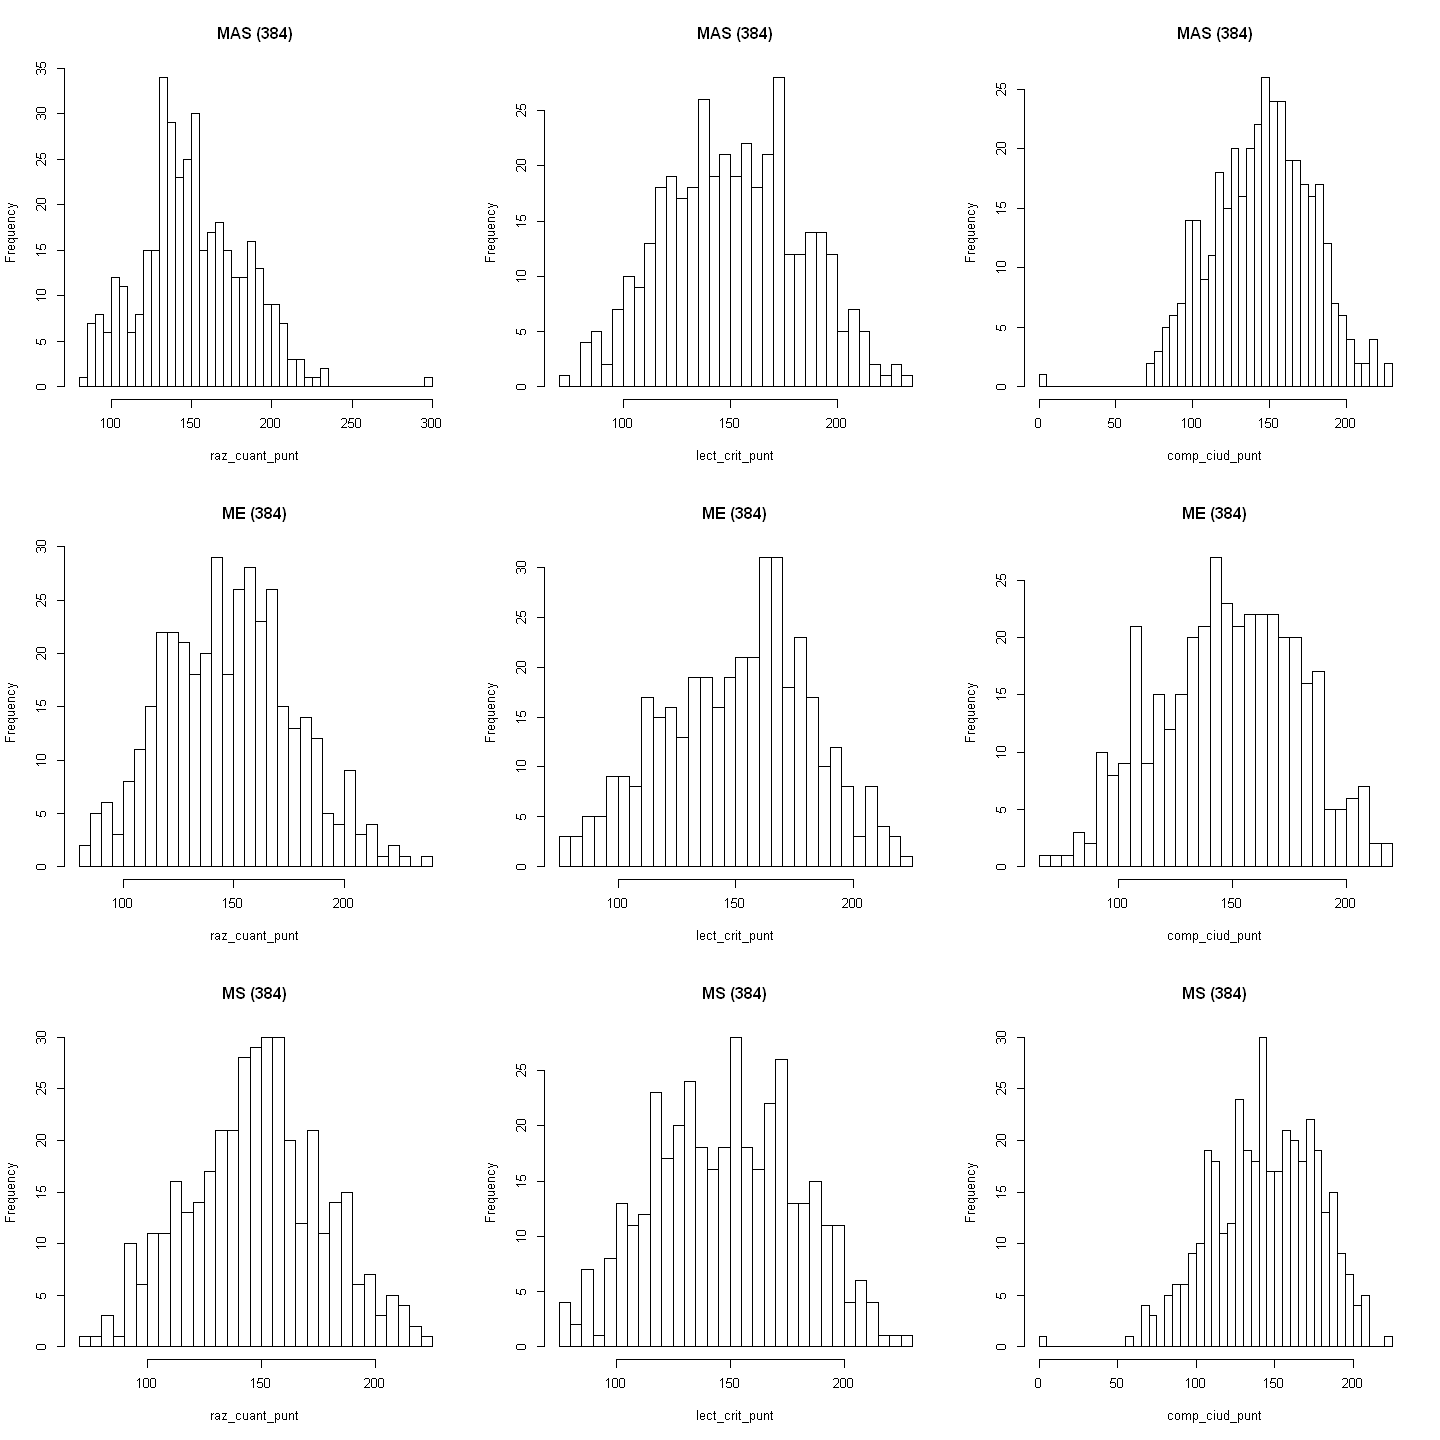

In [54]:
muestreo_Sis<- sys.sample(N=nrow(data),n=n1)
msis<-data[muestreo_Sis,]
par(mfrow=c(3,3))
with(data[s1,], hist(raz_cuant_punt, nclass = 50 , main = 'MAS (384)'))
with(data[s1,], hist(lect_crit_punt, nclass = 50 , main = 'MAS (384)'))
with(data[s1,], hist(comp_ciud_punt, nclass = 50, main = 'MAS (384)'))

with(data[mestratoRC,], hist(raz_cuant_punt, nclass = 50, main = 'ME (384)' ))
with(data[mestratoLC,], hist(lect_crit_punt, nclass = 50, main = 'ME (384)' ))
with(data[mestratoCC,], hist(comp_ciud_punt, nclass = 50 , main = 'ME (384)'))

with(msis, hist(raz_cuant_punt, nclass = 50, main = 'MS (384)' ))
with(msis, hist(lect_crit_punt, nclass = 50 , main = 'MS (384)'))
with(msis, hist(comp_ciud_punt, nclass = 50, main = 'MS (384)' ))

par(mfrow=c(1,1))

### Inferencias

In [55]:
print('Razonamiento Cuantitativo')
inf_RC_90<- inferencia(msis$raz_cuant_punt,1.64)
round(inf_RC_90,2)
print('Lectura Crítica')
inf_LC_90<- inferencia(msis$lect_crit_punt,1.64)
round(inf_LC_90,2)
print("Competencias Ciudadanas")
inf_CC_90<- inferencia(msis$comp_ciud_punt,1.64)
round(inf_CC_90,2)

[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
147.97,29.47,384,1.5,2.47,145.51,150.44


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
148.78,31.53,384,1.61,2.64,146.14,151.42


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
144.55,32.82,384,1.68,2.75,141.8,147.29


In [56]:
print('Razonamiento Cuantitativo')
inf_RC_90<- inferencia(msis$raz_cuant_punt,1.96)
round(inf_RC_90,2)
print('Lectura Crítica')
inf_LC_90<- inferencia(msis$lect_crit_punt,1.96)
round(inf_LC_90,2)
print("Competencias Ciudadanas")
inf_CC_90<- inferencia(msis$comp_ciud_punt,1.96)
round(inf_CC_90,2)

[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
147.97,29.47,384,1.5,2.95,145.03,150.92


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
148.78,31.53,384,1.61,3.15,145.63,151.93


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
144.55,32.82,384,1.68,3.28,141.26,147.83


In [57]:
print('Razonamiento Cuantitativo')
inf_RC_90<- inferencia(msis$raz_cuant_punt,2.57)
round(inf_RC_90,2)
print('Lectura Crítica')
inf_LC_90<- inferencia(msis$lect_crit_punt,2.57)
round(inf_LC_90,2)
print("Competencias Ciudadanas")
inf_CC_90<- inferencia(msis$comp_ciud_punt,2.57)
round(inf_CC_90,2)

[1] "Razonamiento Cuantitativo"


media,desv,N,error.est,error,lim.inf,lim.sup
147.97,29.47,384,1.5,3.86,144.11,151.84


[1] "Lectura Crítica"


media,desv,N,error.est,error,lim.inf,lim.sup
148.78,31.53,384,1.61,4.13,144.64,152.91


[1] "Competencias Ciudadanas"


media,desv,N,error.est,error,lim.inf,lim.sup
144.55,32.82,384,1.68,4.3,140.24,148.85


### Comparaciones entre muestreos 

In [58]:
#n=384
#Para razonamiento cuantitativo
poblacion <- round(mystats(df[,'RC_Puntaje']),4)
MAS <- round(mystats(df[s1,'RC_Puntaje']),4)
ME <- round(mystats(df[mestratoRC,'RC_Puntaje']),4)
MC <- round(mystats(df[muestra_cong,'RC_Puntaje']),4)
MS <- round(mystats(df[muestreo_Sis,'RC_Puntaje']),4)
data.frame(poblacion,MAS,ME,MC,MS)

,poblacion,MAS,ME,MC,MS
tamaño,725295.0000,384.0000,387.0000,401.0000,384.0000
media,149.4512,151.3776,148.7597,150.4090,147.9740
desviación estándar,30.6923,32.2601,29.5134,30.7014,29.4656
simetría,0.1637,0.3389,0.1878,0.1929,0.0155
kurtosis,0.0840,0.4272,-0.3112,-0.6082,-0.3776


Finalmente, podemos observar que en este caso el Muestreo Estratificado es el que más se acerca a la media y simetría de la población total. Esto puede ser debido a que toma muestras de una manera más homogénea y tiene en cuenta el estrato escogido. 

Por otro lado, el Muestreo por Conglomerados es el que más se aproxima a la desviación estándar de la población original, porque en este caso el departamento nos permite agrupar de manera natural todos los datos y que se repartan de forma relativamente homogénea.

También, podemos ver que ningún valor de la kurtosis de los distintos muestreos se asemeja al de la población real, esto debido a que se necesitarían una mayor cantidad de datos en la muestra para que la forma de la distribución sea más parecida a la original.